In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol

In [3]:
# stocks.head(5)

In [4]:
stocks = stocks + '.NS'

In [5]:
stocks = stocks.to_list()

In [6]:
df = yf.download(stocks, start='2013-01-01', end='2023-01-01')['Adj Close']

[*********************100%***********************]  50 of 50 completed


In [7]:
# df

In [8]:
ret_df = df.pct_change()

In [9]:
# ret_df

In [10]:
mtl_ret = (ret_df + 1).resample('M').prod()

In [11]:
# mtl_ret

In [12]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [13]:
# mtl_12

In [14]:
top_ = mtl_12.loc['2013-12-31'].nlargest(5)
bottom_ = mtl_12.loc['2013-12-31'].nsmallest(5)

In [15]:
# top_
# bottom_

In [16]:
top_.name

Timestamp('2013-12-31 00:00:00', freq='M')

In [17]:
mtl_ret[top_.name:][1:2]

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.909905,0.945624,0.982882,0.962653,0.864107,0.995107,0.91578,0.968316,0.953823,1.042541,...,1.037448,0.878778,0.928666,0.839345,1.033606,0.972305,0.965359,0.96973,0.955292,1.03377


In [18]:
relevant_ret = mtl_ret[top_.name:][1:2][top_.index]

In [19]:
relevant_ret

,HCLTECH.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,EICHERMOT.NS
Date,,,,,
2014-01-31,1.161358,0.972305,0.958669,1.033606,0.93373


In [20]:
relevant_ret.mean(axis=1)

Date
2014-01-31    1.011933
Freq: M, dtype: float64

In [21]:
def top_performers(date):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return (relevant_ret).mean(axis=1).values[0]

def bottom_performers(date):
    all_ = mtl_12.loc[date]
    bottom = all_.nsmallest(5)
    relevant_ret = mtl_ret[bottom.name:][1:2][bottom.index]
    return (relevant_ret).mean(axis=1).values[0]

In [22]:
top_performers('2013-12-31')
bottom_performers('2013-12-31')

0.9264812992730314

In [23]:
mom_ret = []
for date in mtl_12.index[:-1]:
    mom_ret.append(top_performers(date))

In [24]:
pd.Series(mom_ret)

0      1.011933
1      1.050188
2      0.969021
3      1.046449
4      1.081803
         ...   
103    1.111629
104    0.946117
105    1.030619
106    1.018830
107    0.990703
Length: 108, dtype: float64

In [25]:
mom_ret = pd.Series(mom_ret).cumprod()
mom_ret

0      1.011933
1      1.062720
2      1.029798
3      1.077631
4      1.165785
         ...   
103    9.603454
104    9.085990
105    9.364198
106    9.540522
107    9.451823
Length: 108, dtype: float64

In [26]:
nifty = yf.download('^NSEI', start='2013-12-31', end='2023-01-01')['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


In [27]:
ret_nifty = nifty.pct_change().dropna()

In [28]:
# ret_nifty

In [29]:
mtl_ret_nifty = (ret_nifty + 1).resample('M').prod()

In [30]:
# mtl_ret_nifty

In [31]:
mtl_ret_nifty = mtl_ret_nifty.cumprod()
mtl_ret_nifty

,Adj Close
Date,
2014-01-31,0.965974
2014-02-28,0.995709
2014-03-31,1.063484
2014-04-30,1.062246
2014-05-31,1.146883
...,...
2022-08-31,2.817148
2022-09-30,2.711667
2022-10-31,2.857265


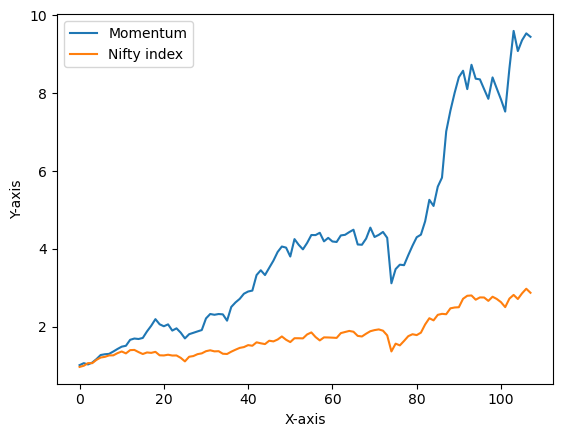

In [32]:
import matplotlib.pyplot as plt

# Assuming 'array1' and 'array2' are your arrays of the same length
array1 = np.array(mom_ret)
array2 = np.array(mtl_ret_nifty)

# Plotting both arrays on the same graph
plt.plot(array1, label='Momentum')
plt.plot(array2, label='Nifty index')

# Adding labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Displaying the plot
plt.show()